Aprendizaje batch
===

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

Definición del problema de regresión univariada
---

Se desean encontra los parámetros $w_0$ y $w_1$ del siguiente modelo de regresión entre las variables $x$ y $y$:

$$y_i = w_1 x_i + w_0 + e_i$$

a partir de un conjunto de observaciones $\{d_i, x_i\}$, donde $d_i$ es el valor real (observado), $y_i$ es su aproximación usando el modelo de regresión descrito, y $e_i$ es el error.

In [2]:
#
# Datos del problema
#
x_sample = np.array(
    [
        0.1087,
        0.2698,
        0.3765,
        0.2146,
        0.9155,
        0.0246,
        0.0221,
        0.8632,
        0.6460,
        0.2092,
        0.8567,
        0.1591,
        0.9647,
        0.6231,
        0.7460,
        0.3654,
        0.3065,
        0.6886,
        0.4966,
        0.2008,
        0.2618,
        0.7607,
        0.1563,
        0.4424,
        0.7731,
    ]
)

y_sample = np.array(
    [
        0.9519,
        1.1237,
        1.2360,
        1.0526,
        2.0743,
        0.7906,
        0.7603,
        2.0533,
        1.6887,
        1.0563,
        2.0991,
        0.8953,
        2.1917,
        1.6266,
        1.8508,
        1.2828,
        1.2283,
        1.8722,
        1.4657,
        1.0418,
        1.1097,
        1.7826,
        0.9711,
        1.4267,
        1.8248,
    ]
)

En otras palabras, se desean encontrar los parámetros $w_0$ y $w_1$ de la recta 

$$y_i = w_0 + w_1 * x_i$$

que minimicen la suma de los errores cuadráticos entre el valor real $d_i$ y el valor pronósticado $y_i$ para cada valor posible de la variable $x_i$, tal como se ilustra en la gráfica de abajo. El error $e_i$ se define como $d_i - y_i$.  

![reg](assets/sdg-1.jpg)

Función de pérdida
----

Se desea encontrar la combinación de parámetros $w_0$ y $w_1$ que minimice:

$$
\begin{split}
\text{SSE} & =  \sum_i e_i^2 \\
    & =  \sum_i (d_i - y_i)^2 \\
    & = \sum_i (d_i - w_0 - w_1 x_i)^2 
\end{split}
$$

Note que en la ecuación anterior, los valores de $x_i$ y $d_i$ son constantes que corresponden a la tabla de datos presentada en la formulación del problema, mientras que las variables son $w_0$ y $w_1$, de tal forma que:

$$\text{SSE}(w_0, w_1) = \sum_i (d_i - w_0 - w_1 x_i)^2 $$

In [3]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def sse(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]
    squared_errors = [error**2 for error in errors]
    return sum(squared_errors)

Pronóstico del modelo para valores arbitrarios
---

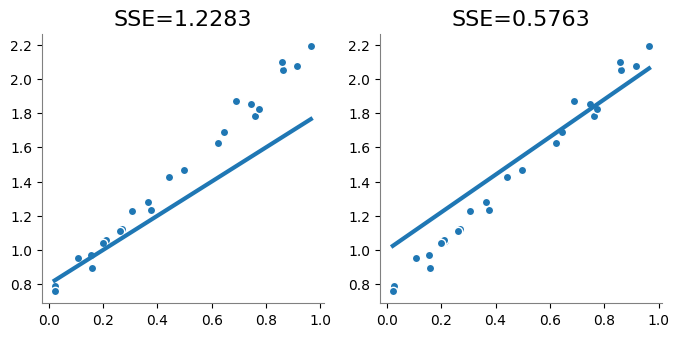

In [4]:
def plot_forecast(w0, w1):
    z_sample = np.linspace(min(x_sample), max(x_sample))
    y_forecasts = w0 + w1 * z_sample

    plt.scatter(x_sample, y_sample, color="tab:blue", edgecolors="white")
    plt.plot(z_sample, y_forecasts, "-", color="tab:blue", linewidth=3)
    plt.title(
        "SSE=" + str(round(sse(w0, w1), 4)),
        fontsize=16,
    )

    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)


plt.figure(figsize=(8, 3.5))

plt.subplot(1, 2, 1)
plot_forecast(w0=0.8, w1=1)

plt.subplot(1, 2, 2)
plot_forecast(w0=1.0, w1=1.1)

Forma de la superficie de la función de pérdida
---

Ya que la función SSE() depende únicamente de los valores de $w_0$ y $w_1$, es posible graficar su forma.

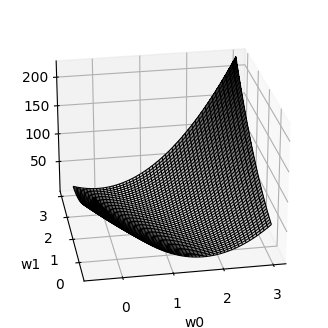

In [5]:
def plot_surface():
    W0 = np.linspace(-0.5, 3.0, 50)
    W1 = np.linspace(-0.5, 3.0, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    #
    # Superficie de error
    #
    ax = plt.figure(figsize=(4, 4)).add_subplot(projection="3d", azim=-100, elev=25)
    ax.plot_surface(W0, W1, F, cmap=cm.binary, linewidth=1, antialiased=False)
    ax.plot_wireframe(W0, W1, F, color="black", linewidth=0.8, alpha=1.0)

    plt.xlabel("w0")
    plt.ylabel("w1")


plot_surface()
plt.show()

Contorno de la función de pérdida
---

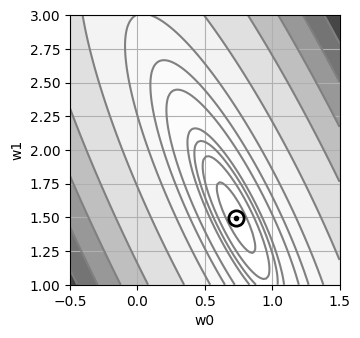

In [6]:
def plot_contour():
    W0 = np.linspace(-0.5, 1.5, 100)
    W1 = np.linspace(1.0, 3.0, 100)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 30, 40, 50, 60]

    _, ax = plt.subplots(figsize=(3.5, 3.5))
    ax.set_aspect("equal", "box")
    ax.contourf(W0, W1, F, cmap=cm.Greys, levels=levels, alpha=0.8)
    ax.contour(W0, W1, F, colors="gray", levels=levels)

    plt.plot(
        [0.731],
        [1.498],
        "o",
        color="black",
        fillstyle="none",
        markersize=11,
        markeredgewidth=2,
    )
    plt.plot([0.731], [1.498], ".", color="black")

    ax.set_xlabel("w0")
    ax.set_ylabel("w1")
    ax.grid()


plot_contour()

En términos de optimización, se desea encontrar las coordenadas $(w_0, w_1)$ del punto más bajo (error mínimo) de la superficie de error.

La función de error es una cuadrática (forma de tazón) con un único punto de mínima global.

Gradiente algebraico de la función de pérdida
---

La función de pérdida está definida como:

$$\text{SSE}(w_0, w_1) = \sum_i (d_i - w_0 - w_1 x_i)^2 $$



La derivada respecto a $w_0$ es:

$$
\begin{split}
    \frac{\partial}{\partial w_0} \text{SSE}(w_0, w_1) 
        & = \frac{\partial}{\partial w_0} \sum_i (d_i - y_i)^2 \\
        & = \frac{\partial}{\partial w_0} \sum_i (d_i - w_0 - w_1 x_i)^2 \\
        & = \sum_i \frac{\partial}{\partial w_0} (d_i - w_0 - w_1 x_i)^2 \\
        & = \sum_i 2 \times (d_i - w_0 - w_1 x_i) \times  \frac{\partial}{\partial w_0} (d_i - w_0 - w_1 x_i) \\
        & = \sum_i 2 \times e_i \times  (-1) \\
        & = -2 \sum_i e_i \\
\end{split}
$$

La derivada respecto a $w_1$ es:

$$
\begin{split}
    \frac{\partial}{\partial w_1} \text{SSE}(w_0, w_1) 
        & = \frac{\partial}{\partial w_1} \sum_i (d_i - y_i)^2 \\
        & = \frac{\partial}{\partial w_1} \sum_i (d_i - w_0 - w_1 x_i)^2 \\
        & = \sum_i \frac{\partial}{\partial w_1} (d_i - w_0 - w_1 x_i)^2 \\
        & = \sum_i 2 * (d_i - w_0 - w_1 x_i) \times  \frac{\partial}{\partial w_1} (d_i - w_0 - w_1 x_i) \\
        & = \sum_i 2 * e_i \times  (-x_i) \\
        & = -2 \sum_i e_i x_i \\
\end{split}
$$

Si los parámetros $w_0$ y $w_1$ se agrupan en el vector de parámetros $\mathbf{w}=[w_0, w_1]'$, entonces:


$$
\frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}) = 
\left[
  \begin{array}{c}
  -2 \sum_i  e_i
  \\
  -2 \sum_i  e_i x_i
  \end{array}
\right]
$$



Codificación del gradiente
--

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1})$$

De esta forma, la función que computa el gradiente se implementa como:

In [7]:
def gradient(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]

    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]

    gradient_w0 = -2 * sum(errors)
    gradient_w1 = -2 * sum(
        [error * x_value for error, x_value in zip(errors, x_sample)]
    )

    return gradient_w0, gradient_w1

Ecuación de mejora
---

A partir de las definiciones y cómputos anteriores, es posible implementar el proceso iterativo de mejora de los pesos usando la ecuación:

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1})$$

In [8]:
def improve(w0, w1, mu):
    gradient_w0, gradient_w1 = gradient(w0, w1)

    w0 = w0 - mu * gradient_w0
    w1 = w1 - mu * gradient_w1

    return w0, w1

Proceso iterativo
---

Para realizar la optimización numérica, se parte de unos pesos iniciales aleatorios.

 w0 = 0.6786
 w1 = 1.6341
SSE = 0.0924


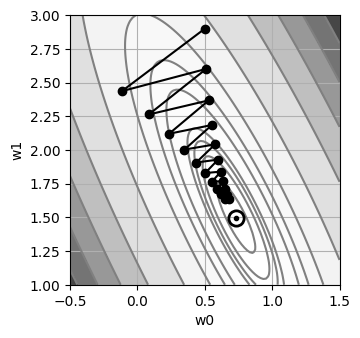

In [9]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 2.9

history = {
    "w0": [w0],
    "w1": [w1],
    "sse": [sse(w0, w1)],
}

mu = 0.03

for epoch in range(20):
    w0, w1 = improve(w0, w1, mu)

    history["w0"].append(w0)
    history["w1"].append(w1)
    history["sse"].append(sse(w0, w1))

print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}".format(w0, w1, sse(w0, w1)))

plot_contour()
plt.plot(history["w0"], history["w1"], marker="o", color="black")
plt.show()

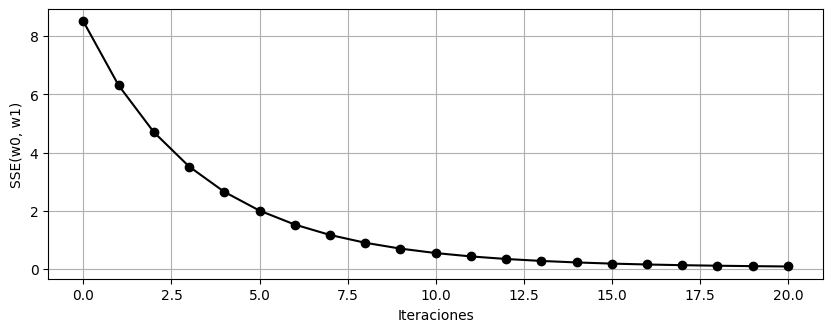

In [10]:
plt.figure(figsize=(10, 3.5))
plt.plot(history["sse"], "o-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.grid()

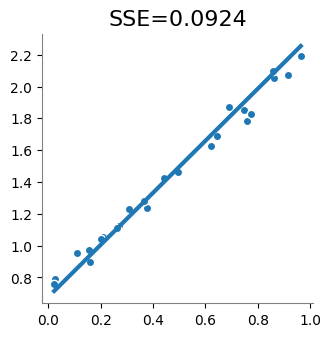

In [11]:
#
# A continuación se grafica la recta encontrada.
#
plt.figure(figsize=(3.5, 3.5))
plot_forecast(w0, w1)